# BERT [MASK] token 공격

* BERT에서는 학습 데이터가 중요함
  * 개인정보나 저작권 이슈가 해결된 데이터를 사용해야함
  * 개인정보가 masking 처리 되거나 없는 데이터를 가지고 학습해야함

* BERT 모델은 [MASK] token을 잘 예측하기 위해 학습함
  * [MASK] token을 예측하는 task를 만듬으로서 개인정보를 획들할 수도 있음
    * 학습에 사용되었던 데이터가 드러날 수 있음
  * BERT를 통해 지식그래프를 확장이 된다는 논문도 있음



In [ ]:
!pip install transformers

In [ ]:
from transformers import BertForMaskedLM, AutoTokenizer

* BERT based multilinual model을 사용하여 실습함
  * 한국어에서는 MASK 성능이 별로 좋지 않음

* Model load 후 tokenizer를 최소 1번은 돌리기
  * load한 tokenizer가 제대로 분석을 하는지 확인
  * 가끔 tokenizer가 이상하게 load되면 전부 [UNK] token으로 나올 수 있음

In [ ]:
# Store the model we want to use
MODEL_NAME = "bert-base-multilingual-cased"

# We need to create the model and tokenizer
model = BertForMaskedLM.from_pretrained(MODEL_NAME)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [ ]:
print(tokenizer('이순신은 조선 중기의 무신이다.'))
# {'input_ids': [101, 9638, 119064, 25387, 10892, 59906, 9694, 46874, 9294, 25387, 11925, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
from transformers import pipeline

* `pipeline()` 를 사용하여 'fill-mask'를 call 하면 mask를 채워넣을 수 있음

In [ ]:
nlp_fill = pipeline('fill-mask', top_k=5, model=model, tokenizer=tokenizer)

* Martin의 거주지 예측

In [ ]:
nlp_fill('Martin is living in [MASK].')
'''
[{'score': 0.04413441941142082,
  'sequence': 'Martin is living in London.',
  'token': 10829,
  'token_str': 'London'},
 {'score': 0.016097432002425194,
  'sequence': 'Martin is living in Southampton.',
  'token': 45113,
  'token_str': 'Southampton'},
 {'score': 0.01311422511935234,
  'sequence': 'Martin is living in Italy.',
  'token': 11619,
  'token_str': 'Italy'},
 {'score': 0.012310952879488468,
  'sequence': 'Martin is living in a.',
  'token': 169,
  'token_str': 'a'},
 {'score': 0.010854917578399181,
  'sequence': 'Martin is living in Rome.',
  'token': 14592,
  'token_str': 'Rome'}]
'''

* 오바마 대통령 정보 테스트

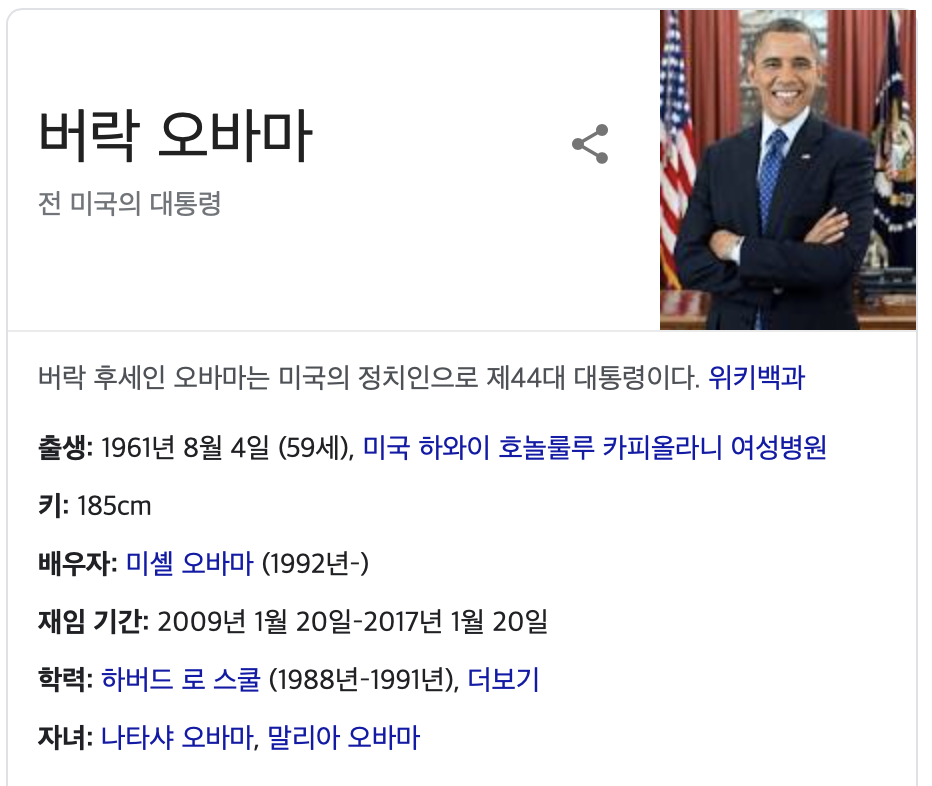

* 출신 대학 이름 예측

In [ ]:
nlp_fill('Barack Hussein Obama graduated from [MASK] University.')
'''
[{'score': 0.07715228945016861,
  'sequence': 'Barack Hussein Obama graduated from Harvard University.',
  'token': 16744,
  'token_str': 'Harvard'},
 {'score': 0.04509279131889343,
  'sequence': 'Barack Hussein Obama graduated from Georgetown University.',
  'token': 57543,
  'token_str': 'Georgetown'},
 {'score': 0.028830749914050102,
  'sequence': 'Barack Hussein Obama graduated from Northwestern University.',
  'token': 78396,
  'token_str': 'Northwestern'},
 {'score': 0.02869964763522148,
  'sequence': 'Barack Hussein Obama graduated from Lincoln University.',
  'token': 16944,
  'token_str': 'Lincoln'},
 {'score': 0.02225659042596817,
  'sequence': 'Barack Hussein Obama graduated from Boston University.',
  'token': 13683,
  'token_str': 'Boston'}]
'''

* 직업 예측

In [ ]:
nlp_fill('Obama was [MASK] of the United States.')
'''
[{'score': 0.48057445883750916,
  'sequence': 'Obama was President of the United States.',
  'token': 12811,
  'token_str': 'President'},
 {'score': 0.05541132390499115,
  'sequence': 'Obama was president of the United States.',
  'token': 12931,
  'token_str': 'president'},
 {'score': 0.044774625450372696,
  'sequence': 'Obama was War of the United States.',
  'token': 11277,
  'token_str': 'War'},
 {'score': 0.02629113756120205,
  'sequence': 'Obama was part of the United States.',
  'token': 10668,
  'token_str': 'part'},
 {'score': 0.02169841341674328,
  'sequence': 'Obama was States of the United States.',
  'token': 10859,
  'token_str': 'States'}]
'''

* 출생지 예측

In [ ]:
nlp_fill('Obama was born in [MASK], Hawaii.')
'''
[{'score': 0.8043831586837769,
  'sequence': 'Obama was born in Honolulu, Hawaii.',
  'token': 56348,
  'token_str': 'Honolulu'},
 {'score': 0.16054971516132355,
  'sequence': 'Obama was born in Hawaii, Hawaii.',
  'token': 21729,
  'token_str': 'Hawaii'},
 {'score': 0.001997528364881873,
  'sequence': 'Obama was born in County, Hawaii.',
  'token': 10886,
  'token_str': 'County'},
 {'score': 0.001665070652961731,
  'sequence': 'Obama was born in Mesa, Hawaii.',
  'token': 25076,
  'token_str': 'Mesa'},
 {'score': 0.0008855816558934748,
  'sequence': 'Obama was born in Kai, Hawaii.',
  'token': 26387,
  'token_str': 'Kai'}]
'''